# 3. n-bit parrallel XOR
Name: Sai Krishna Teja Varma Manthena\
UnityID: smanthe

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
def qxor(circ, a, b):
    circ.cx(a, b)

In [3]:
n = 13
q = QuantumRegister(n)  
qc = QuantumCircuit(q)

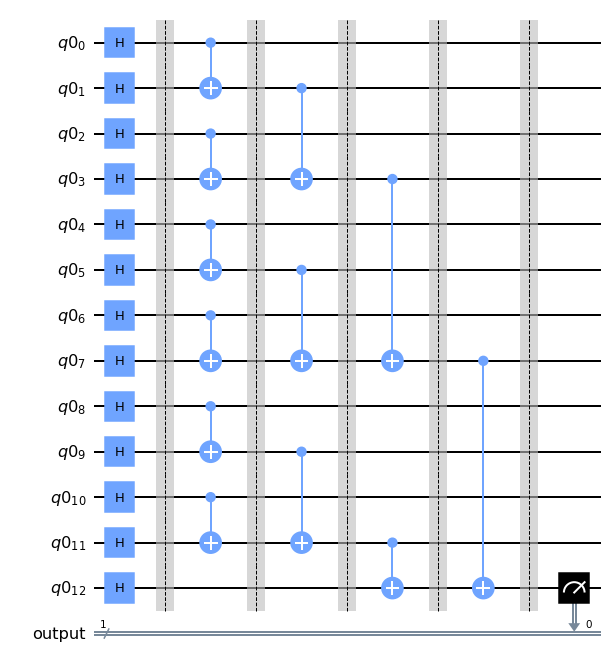

In [4]:
qc.h(q)
qc.barrier()
arr = [i for i in range(0,n)]
arr2= []
while len(arr)>1:
    i = 0
    while i < len(arr)-1:
        qxor(qc,q[arr[i]],q[arr[i+1]])
        arr2.append(arr[i])
        i = i + 2
    for j in arr2:
        arr.remove(j)
    qc.barrier()
    arr2 = []
m = ClassicalRegister(1, 'output')
qc.add_register(m)
qc.measure(arr[0],m)
qc.draw(output="mpl")

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=4096)
result = job.result()
print(result.get_counts())

{'1': 2017, '0': 2079}


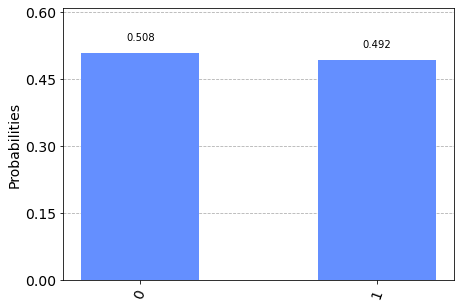

In [6]:
plot_histogram(result.get_counts())